# COVID_19 INDIA STATEWISE DATA ANALYSIS

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
dataframe = pd.read_csv("Latest Covid-19 India Status.csv")

In [204]:
df=dataframe.copy()

In [206]:
print(df.head())

             State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio  \
0  Andaman and Nicobar        10766       0       10637     129           0.0   
1       Andhra Pradesh      2340676       0     2325943   14733           0.0   
2    Arunachal Pradesh        67049       0       66753     296           0.0   
3                Assam       746159       5      738119    8035           0.0   
4                Bihar       855267       1      842952   12314           0.0   

   Discharge Ratio  Death Ratio  Population  
0            98.80         1.20   100896618  
1            99.37         0.63   128500364  
2            99.56         0.44      658019  
3            98.92         1.08      290492  
4            98.56         1.44    40100376  


In [208]:
print(df.tail())

        State/UTs  Total Cases  Active  Discharged  Deaths  Active Ratio  \
31      Telengana       844432       8      840313    4111          0.00   
32        Tripura       108493       1      107550     942          0.00   
33  Uttar Pradesh      2145431      57     2121662   23712          0.00   
34    Uttarakhand       452571       0      444803    7768          0.00   
35    West Bengal      2126282     135     2104592   21555          0.01   

    Discharge Ratio  Death Ratio  Population  
31            99.51         0.49    69599762  
32            99.13         0.87     1646050  
33            98.89         1.11     1158040  
34            98.28         1.72    85002417  
35            98.98         1.01    32199722  


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State/UTs        36 non-null     object 
 1   Total Cases      36 non-null     int64  
 2   Active           36 non-null     int64  
 3   Discharged       36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB


In [212]:
df.isnull().sum()

State/UTs          0
Total Cases        0
Active             0
Discharged         0
Deaths             0
Active Ratio       0
Discharge Ratio    0
Death Ratio        0
Population         0
dtype: int64

In [214]:
df.rename(columns={
    "State/UTs": "State",
    "Total Cases": "Total_Cases",
    "Active": "Active_Cases",
    "Discharged": "Recovered"
}, inplace=True)


In [216]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            36 non-null     object 
 1   Total_Cases      36 non-null     int64  
 2   Active_Cases     36 non-null     int64  
 3   Recovered        36 non-null     int64  
 4   Deaths           36 non-null     int64  
 5   Active Ratio     36 non-null     float64
 6   Discharge Ratio  36 non-null     float64
 7   Death Ratio      36 non-null     float64
 8   Population       36 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.7+ KB
None


In [218]:
df.describe()

,Total_Cases,Active_Cases,Recovered,Deaths,Active Ratio,Discharge Ratio,Death Ratio,Population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,1.249975e+06,50.333333,1.235146e+06,14778.527778,0.005000,98.897222,1.097778,3.971861e+07
std,1.846038e+06,207.118048,1.820328e+06,27221.140636,0.026673,0.506854,0.494791,5.050913e+07
min,1.076600e+04,0.000000,1.063700e+04,4.000000,0.000000,97.410000,0.030000,6.600100e+04
25%,1.065430e+05,0.000000,1.055395e+05,1124.250000,0.000000,98.690000,0.840000,1.695473e+06
50%,6.140910e+05,1.500000,6.076750e+05,6551.000000,0.000000,98.935000,1.065000,2.410088e+07
75%,1.331951e+06,9.000000,1.322329e+06,14325.750000,0.000000,99.160000,1.310000,6.979986e+07
max,8.171048e+06,1233.000000,8.022276e+06,148558.000000,0.160000,99.970000,2.440000,2.315026e+08


### TOP 5 STATES WITH HIGHEST COVID CASES

In [221]:
top_states = df.sort_values(by="Total_Cases", ascending=False).head(5)
print("Top 5 States with Highest Cases:\n", top_states[['State', 'Total_Cases']])

Top 5 States with Highest Cases:
              State  Total_Cases
20     Maharashtra      8171048
16          Kerala      6907241
15       Karnataka      4088769
30      Tamil Nadu      3610655
1   Andhra Pradesh      2340676


In [224]:
df["Recovery_Rate"] = (df["Recovered"] / df["Total_Cases"]) * 100
df["Death_Rate"] = (df["Deaths"] / df["Total_Cases"]) * 100

# Display the updated dataset with calculated rates
print(df[["State", "Total_Cases", "Recovered", "Deaths", "Recovery_Rate", "Death_Rate"]].head())

                 State  Total_Cases  Recovered  Deaths  Recovery_Rate  \
0  Andaman and Nicobar        10766      10637     129      98.801783   
1       Andhra Pradesh      2340676    2325943   14733      99.370566   
2    Arunachal Pradesh        67049      66753     296      99.558532   
3                Assam       746159     738119    8035      98.922482   
4                Bihar       855267     842952   12314      98.560099   

   Death_Rate  
0    1.198217  
1    0.629434  
2    0.441468  
3    1.076848  
4    1.439784  


### Bar Chart - Top 10 States with Highest Recovery Rates

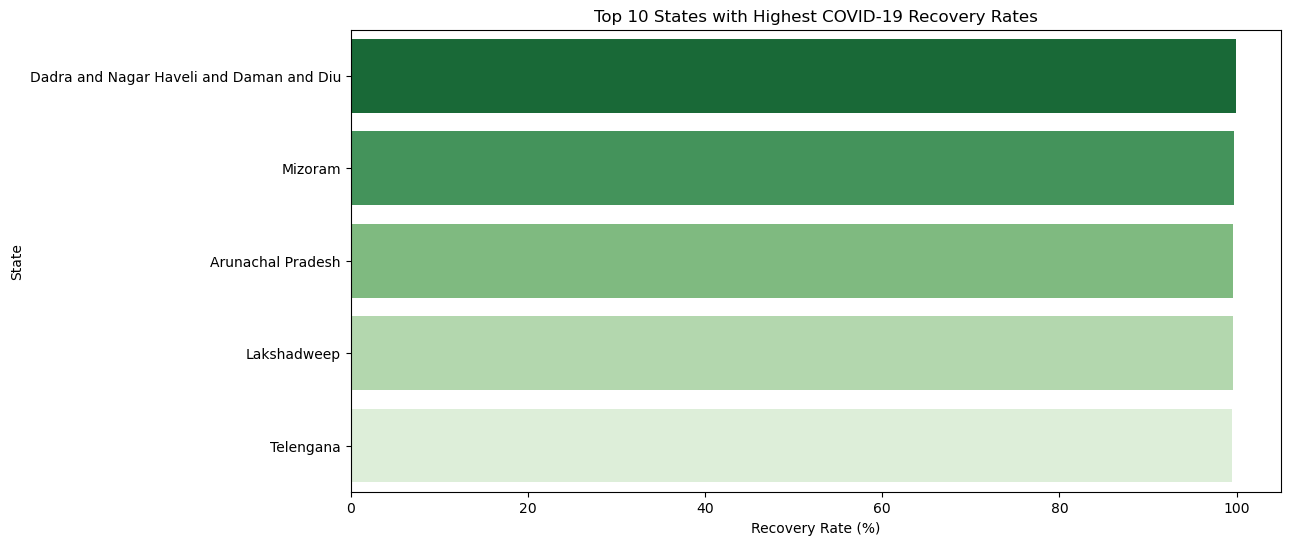

In [227]:
plt.figure(figsize=(12, 6))
top_states = df.sort_values(by="Recovery_Rate", ascending=False).head(5)
sns.barplot(data=top_states, x="Recovery_Rate", y="State", hue='State', palette="Greens_r",legend='auto')

plt.xlabel("Recovery Rate (%)")
plt.ylabel("State")
plt.title("Top 10 States with Highest COVID-19 Recovery Rates")
plt.show()


## Top 5 states with highest death rates

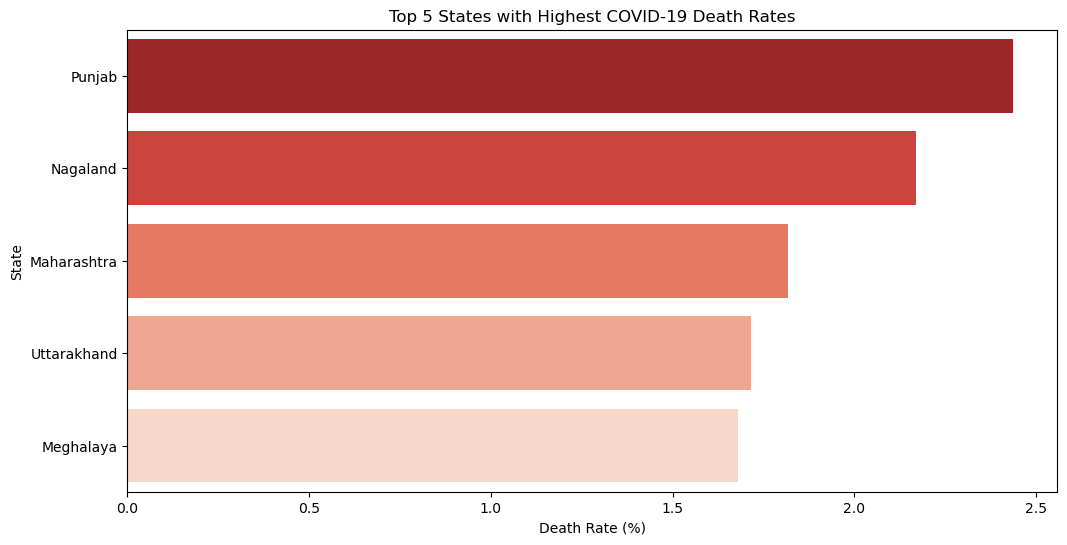

In [230]:
plt.figure(figsize=(12, 6))
top_states = df.sort_values(by="Death_Rate", ascending=False).head(5)
sns.barplot(data=top_states, x="Death_Rate", y="State", hue='State', palette="Reds_r")

plt.xlabel("Death Rate (%)")
plt.ylabel("State")
plt.title("Top 5 States with Highest COVID-19 Death Rates")
plt.show()


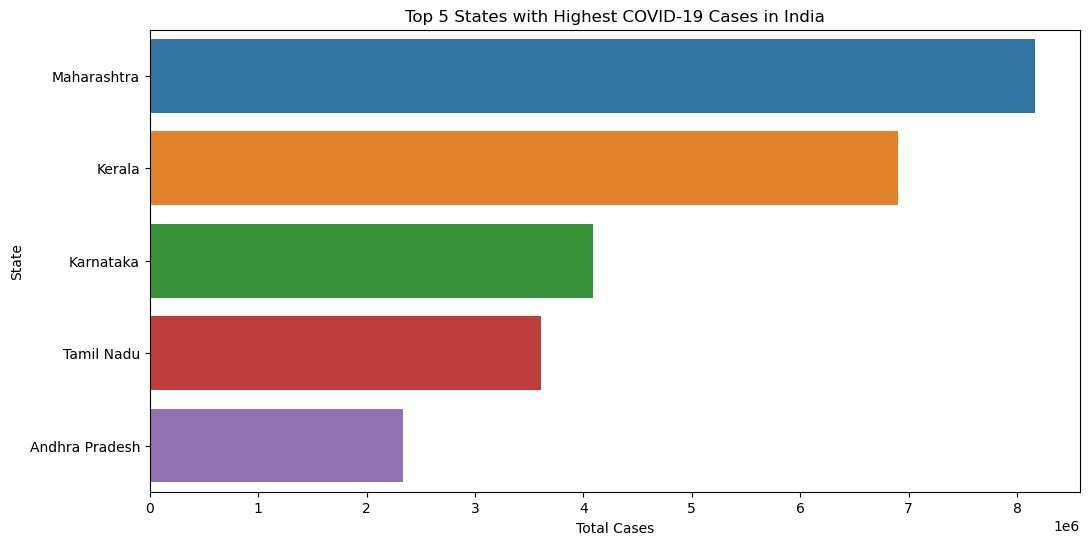

In [232]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values(by="Total_Cases", ascending=False).head(5), 
            x="Total_Cases", y="State",hue='State',legend='auto')
plt.xlabel("Total Cases")
plt.ylabel("State")
plt.title("Top 5 States with Highest COVID-19 Cases in India")
plt.show()

### Least 5 states 

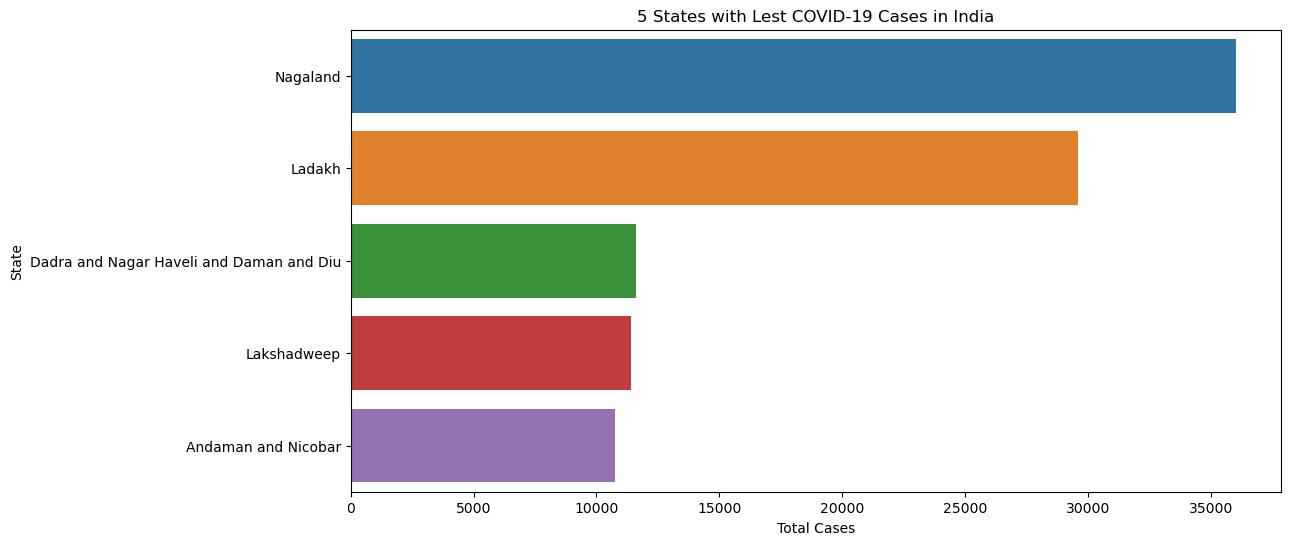

In [236]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values(by="Total_Cases", ascending=False).tail(5), 
            x="Total_Cases", y="State",hue='State',legend='auto')
plt.xlabel("Total Cases")
plt.ylabel("State")
plt.title("5 States with Lest COVID-19 Cases in India")
plt.show()

### Pie Chart - Recovery vs Deaths

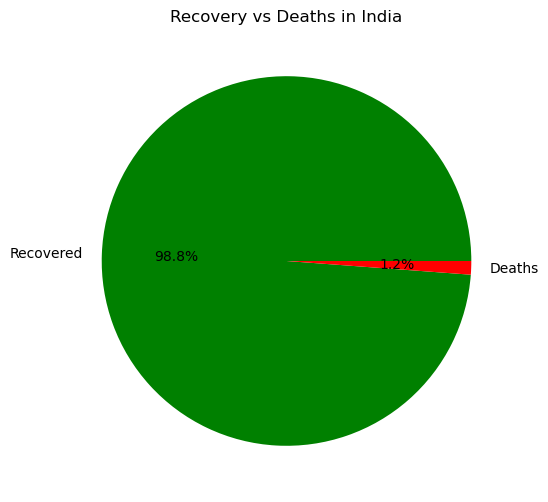

In [70]:
plt.figure(figsize=(6, 6))
df_sum = df[['Recovered', 'Deaths']].sum()
df_sum.plot(kind='pie', autopct='%1.1f%%', colors=["green", "red"])
plt.title("Recovery vs Deaths in India")
plt.ylabel("")
plt.show()

### Recovery Rate: The recovery rate in India is almost 99%, indicating good control over the virus.

### Heatmap - Correlation Between Features

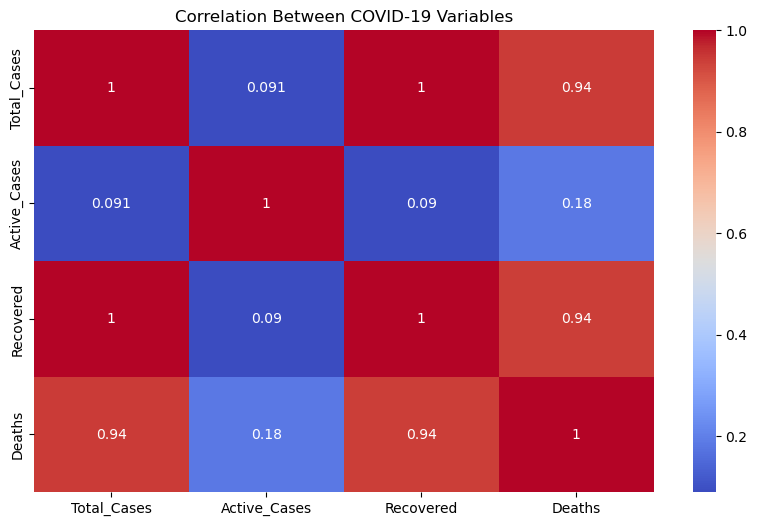

In [242]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Total_Cases', 'Active_Cases', 'Recovered', 'Deaths']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between COVID-19 Variables")
plt.show()

## Final Conclusion

### Summary of Findings:

### Recovery rates were highest in [Dadra and Nagar Haveli and Daman and Diu, Mizoram and Arunachal Pradesh], indicating effective healthcare measures.
### Death rates were notably high in [Punjab and Nagaland], suggesting potential issues with medical infrastructure or late hospital admissions.

## Key Insights:

### Correlation Observed: States with higher population densities generally had higher infection rates.
### Healthcare Impact: States with better healthcare facilities and early intervention programs had significantly higher recovery rates.

##  Limitations:

### Lack of real-time data might limit the accuracy of certain insights.